# Basic Information

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Gettin shape of the dataset
df.shape

(9800, 18)

In [5]:
# basic overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Description about numeric columns
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Data Cleaning

### Check for empty colums and datatype

In [7]:
# Counting the total count of empty values

empty_count = df["Postal Code"].isnull().sum()
print("Total number of empty values are :",empty_count)

Total number of empty values are : 11


In [8]:
# Filling empty columns with 0
df["Postal Code"].fillna(0, inplace = True)

# changing the datatype
df["Postal Code"] = df["Postal Code"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Cheking for duplicates

In [9]:
# method 1: Using conditional statements

if df.duplicated().sum() > 0:
    print("Duplicates are present")
else:
    print("Duplicates are not present")

Duplicates are not present


In [10]:
# method 2: using duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [11]:
# method 3: Using keep arguement
duplicate_count = df.duplicated(keep=False).sum()
print("Count of duplicates is ",duplicate_count)

Count of duplicates is  0


# Exploratory Data Analysis

### Customer Segmentation

In [12]:
# types of customers
types_of_customers = df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [13]:
# No. of customers in each segment
num_of_customers = df["Segment"].value_counts().reset_index()

# Renaming the columns
num_of_customers = num_of_customers.rename(columns={'Segment':'Customer Type','count':'Total Customers'})
print(num_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


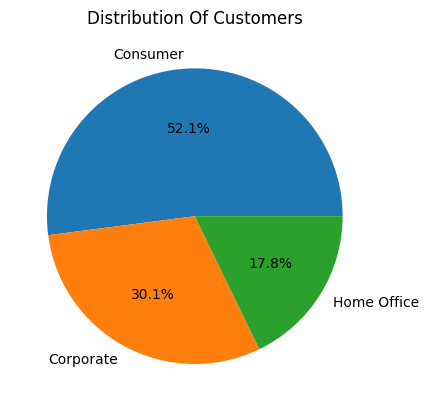

In [14]:
# plotting pie chart 
plt.pie(num_of_customers['Total Customers'],labels=num_of_customers['Customer Type'], autopct='%1.1f%%')

# Set pie chart labels
plt.title("Distribution Of Customers")

plt.show()

### Sales per Customer Segment

In [15]:
# Sales per customer segment
sales_per_customer_segment = df.groupby('Segment')['Sales'].sum().reset_index()

# Renaming the columns
sales_per_customer_segment = sales_per_customer_segment.rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
print(sales_per_customer_segment)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


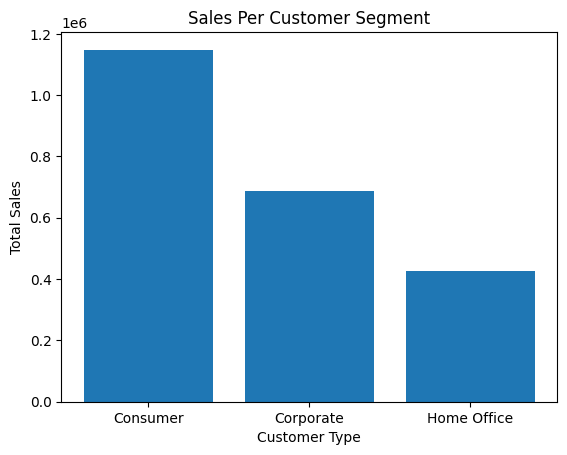

In [16]:
# Plotting the bar graph
plt.bar(sales_per_customer_segment['Customer Type'], sales_per_customer_segment['Total Sales'])

# Plotting the titles
plt.title("Sales Per Customer Segment")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")

plt.show()

## Ranking Customers

### 1.Based on total orders

In [17]:
# Checking for repeat customers
customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

# Renaming the columns
customer_order_freq.rename(columns={'Segment':'Customer Type','Order ID':'Total Orders'},inplace=True)

# Identify Repeat Customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders']>=1]

# Sort repeat customers descendinf
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders',ascending=False)

# Top 10 Customers Based on orders
print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name Customer Type  Total Orders
0    WB-21850        William Brown      Consumer            35
1    PP-18955           Paul Prost   Home Office            34
2    MA-17560         Matt Abelman   Home Office            34
3    JL-15835             John Lee      Consumer            33
4    CK-12205  Chloris Kastensmidt      Consumer            32
5    SV-20365          Seth Vernon      Consumer            32
6    JD-15895     Jonathan Doherty     Corporate            32
7    AP-10915       Arthur Prichep      Consumer            31
8    ZC-21910     Zuschuss Carroll      Consumer            31
9    EP-13915           Emily Phan      Consumer            31


### 2. Bases on total sales

In [18]:
# Checking for total sales per customer
customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

#Renaming the column
customer_sales.rename(columns={'Sales':'Total Sales'},inplace=True)

# Sort in descending order
top_customers_by_sales =  customer_sales.sort_values(by='Total Sales',ascending = False)

print(top_customers_by_sales.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment  Total Sales
0    SM-20320         Sean Miller  Home Office    25043.050
1    TC-20980        Tamara Chand    Corporate    19052.218
2    RB-19360        Raymond Buch     Consumer    15117.339
3    TA-21385        Tom Ashbrook  Home Office    14595.620
4    AB-10105       Adrian Barton     Consumer    14473.571
5    KL-16645        Ken Lonsdale     Consumer    14175.229
6    SC-20095        Sanjit Chand     Consumer    14142.334
7    HL-15040        Hunter Lopez     Consumer    12873.298
8    SE-20110        Sanjit Engle     Consumer    12209.438
9    CC-12370  Christopher Conant     Consumer    12129.072


### Modes of Shipping

In [19]:
# Getting unique values of shipping mode
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [20]:
shipping_mode = df['Ship Mode'].unique()
print("The shipping modes are : ",shipping_mode)

The shipping modes are :  ['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [21]:
# count frequency of each shipping mode
shipping_mode_freq = df['Ship Mode'].value_counts().reset_index()

# Rename the columns
shipping_mode_freq = shipping_mode_freq.rename(columns={'count':'Mode Frequency'})
print(shipping_mode_freq)

        Ship Mode  Mode Frequency
0  Standard Class            5859
1    Second Class            1902
2     First Class            1501
3        Same Day             538


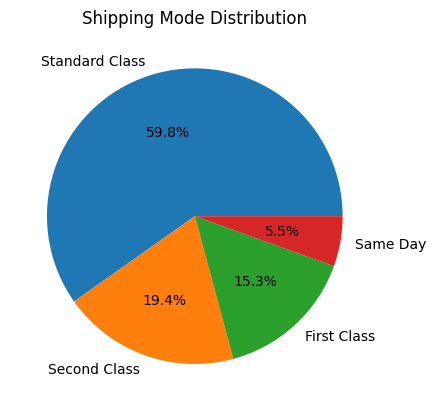

In [22]:
# Plotting pie chart
plt.pie(shipping_mode_freq['Mode Frequency'], labels = shipping_mode_freq['Ship Mode'], autopct = '%1.1f%%')

# Setting the titles
plt.title("Shipping Mode Distribution")

plt.show()

## Geographical Analysis

### State

In [23]:
# Count number of states
count_state = df['State'].nunique()
print("Their are ",count_state,"States")

Their are  49 States


**Customers**

In [24]:
# Customers per state
cust_per_state = df['State'].value_counts().reset_index()

# Rename the columns
cust_per_state = cust_per_state.rename(columns={'count': 'Total Customers'})

print(cust_per_state)

                   State  Total Customers
0             California             1946
1               New York             1097
2                  Texas              973
3           Pennsylvania              582
4             Washington              504
5               Illinois              483
6                   Ohio              454
7                Florida              373
8               Michigan              253
9         North Carolina              247
10              Virginia              224
11               Arizona              223
12             Tennessee              183
13              Colorado              179
14               Georgia              177
15              Kentucky              137
16               Indiana              135
17         Massachusetts              135
18                Oregon              122
19            New Jersey              122
20              Maryland              105
21             Wisconsin              105
22              Delaware          

In [25]:
# Top 10 States with highest customers
print(cust_per_state.head(10))

            State  Total Customers
0      California             1946
1        New York             1097
2           Texas              973
3    Pennsylvania              582
4      Washington              504
5        Illinois              483
6            Ohio              454
7         Florida              373
8        Michigan              253
9  North Carolina              247


**Sales**

In [26]:
# Counting total sales per state
sales_per_state = df.groupby('State')['Sales'].sum().reset_index()

# Renaming the column
sales_per_state = sales_per_state.rename(columns={'Sales':'Total Sales'})

print(sales_per_state)

                   State  Total Sales
0                Alabama   19510.6400
1                Arizona   35272.6570
2               Arkansas   11678.1300
3             California  446306.4635
4               Colorado   31841.5980
5            Connecticut   13384.3570
6               Delaware   27322.9990
7   District of Columbia    2865.0200
8                Florida   88436.5320
9                Georgia   48219.1100
10                 Idaho    4382.4860
11              Illinois   79236.5170
12               Indiana   48718.4000
13                  Iowa    4443.5600
14                Kansas    2914.3100
15              Kentucky   36458.3900
16             Louisiana    9131.0500
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   28634.4340
20              Michigan   76136.0740
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

In [27]:
# Top 10 States by total sales
top_sales_state = sales_per_state.sort_values(by='Total Sales',ascending=False)
print(top_sales_state.head(10).reset_index(drop=True))

          State  Total Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


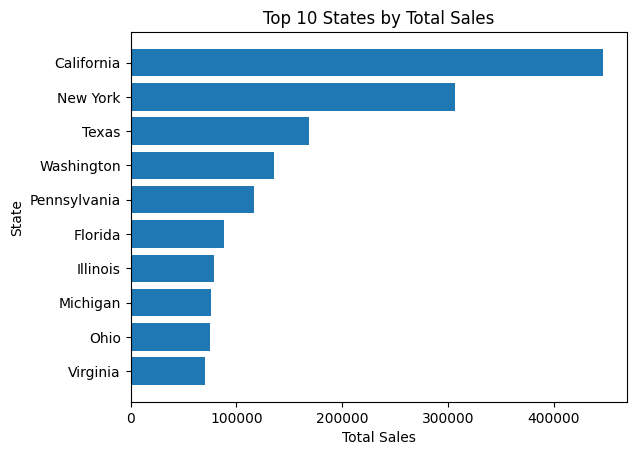

In [28]:
# Plotting bar graph
top_10_states = top_sales_state.head(10).reset_index(drop=True)
plt.barh(top_10_states['State'], top_10_states['Total Sales'])

# Labels and title
plt.ylabel('State')
plt.xlabel('Total Sales')
plt.title('Top 10 States by Total Sales')
plt.gca().invert_yaxis()

plt.show()

### Customer

In [29]:
# Count number of cities
count_state = df['City'].nunique()
print("Their are ",count_state,"Cities")

Their are  529 Cities


**Note:** Not printing all the cities as their are a lot of cities

**Customer**

In [30]:
# Customers per state
cust_per_city = df['City'].value_counts().reset_index()

# Rename the columns
cust_per_city = cust_per_city.rename(columns={'count': 'Total Customers'})

# Sort for top cities 
top_cust_city = cust_per_city.sort_values(by='Total Customers',ascending=False)

# top 10 cities with highest customers
top_10_cities_per_cust = top_cust_city.head(10)

print(top_10_cities_per_cust)

            City  Total Customers
0  New York City              891
1    Los Angeles              728
2   Philadelphia              532
3  San Francisco              500
4        Seattle              426
5        Houston              374
6        Chicago              308
7       Columbus              221
8      San Diego              170
9    Springfield              161


**Sales**

In [31]:
# Counting total sales per city
sales_per_city = df.groupby('City')['Sales'].sum().reset_index()

# Renaming the column
sales_per_city = sales_per_city.rename(columns={'Sales':'Total Sales'})

# Sorting cities with highest sales
top_sales_city = sales_per_city.sort_values(by='Total Sales',ascending=False)

# top 10 cities with highest sales
top_10_cities_per_sales = top_sales_city.head(10).reset_index(drop=True)

print(top_10_cities_per_sales)

            City  Total Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


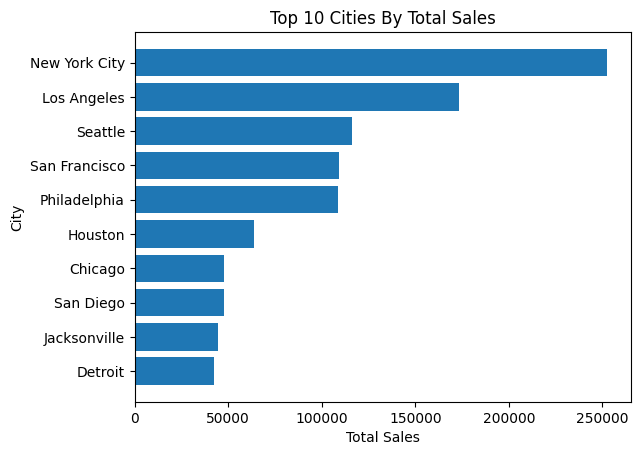

In [32]:
# Plotting bar graph 
plt.barh(top_10_cities_per_sales['City'], top_10_cities_per_sales['Total Sales'])

# Labels and title
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Top 10 Cities By Total Sales')
plt.gca().invert_yaxis()

plt.show()

## Product Analysis

#### Category

In [33]:
# unique value for product category
product_category = df['Category'].unique()
print("Product categories are : ",product_category)

Product categories are :  ['Furniture' 'Office Supplies' 'Technology']


In [34]:
# count total product for each category
total_products_by_category = df['Category'].value_counts().reset_index()

# Renaming the columns
total_products_by_category = total_products_by_category.rename(columns={'count':'Total Products'})

print(total_products_by_category)

          Category  Total Products
0  Office Supplies            5909
1        Furniture            2078
2       Technology            1813


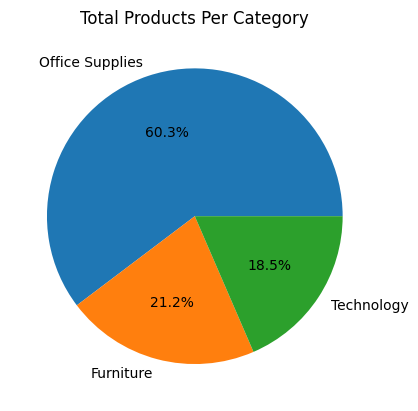

In [35]:
# plotting pie chart
plt.pie(total_products_by_category['Total Products'], labels=total_products_by_category['Category'], autopct = '%1.1f%%')

# title
plt.title("Total Products Per Category")

plt.show()

In [36]:
# Sales per product category
sales_per_product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

# Renaming the columns
sales_per_product_category = sales_per_product_category.rename(columns={'Category':'Product Category','Sales':'Total Sales'})

print(sales_per_product_category)

  Product Category  Total Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


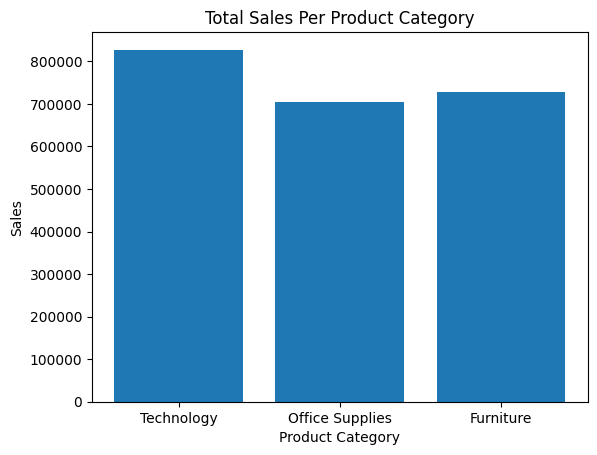

In [37]:
# plotting bar graph
plt.bar(sales_per_product_category['Product Category'],sales_per_product_category['Total Sales'])

# Labels and title
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.title("Total Sales Per Product Category")
plt.gca().invert_xaxis()

plt.show()

#### Sub Category

In [38]:
# Unique Values of product sub-category
product_sub_category = df['Sub-Category'].nunique()
print("Their are ",product_sub_category,"Product Sub Catogires")

Their are  17 Product Sub Catogires


In [39]:
# count total product for each sub-category
total_products_by_sub_category = df['Sub-Category'].value_counts().reset_index()

# Renaming the columns
total_products_by_subcategory = total_products_by_sub_category.rename(columns={'count':'Total Products'})

print(total_products_by_sub_category)

   Sub-Category  count
0       Binders   1492
1         Paper   1338
2   Furnishings    931
3        Phones    876
4       Storage    832
5           Art    785
6   Accessories    756
7        Chairs    607
8    Appliances    459
9        Labels    357
10       Tables    314
11    Envelopes    248
12    Bookcases    226
13    Fasteners    214
14     Supplies    184
15     Machines    115
16      Copiers     66


In [40]:
# Sales per product sub-category
sales_per_product_sub_category = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Renaming the columns
sales_per_product_sub_category = sales_per_product_sub_category.rename(columns={'Sub-Category':'Product Sub-Category','Sales':'Total Sales'})

print(sales_per_product_sub_category)

   Product Sub-Category  Total Sales
0           Accessories  164186.7000
1            Appliances  104618.4030
2                   Art   26705.4100
3               Binders  200028.7850
4             Bookcases  113813.1987
5                Chairs  322822.7310
6               Copiers  146248.0940
7             Envelopes   16128.0460
8             Fasteners    3001.9600
9           Furnishings   89212.0180
10               Labels   12347.7260
11             Machines  189238.6310
12                Paper   76828.3040
13               Phones  327782.4480
14              Storage  219343.3920
15             Supplies   46420.3080
16               Tables  202810.6280


In [41]:
# top 10 product sub categories per sales
top_sub_category_sales = sales_per_product_sub_category.sort_values(by='Total Sales',ascending=False)

top_10_sub_category_sales = top_sub_category_sales.head(10).reset_index(drop=True)
print(top_10_sub_category_sales)

  Product Sub-Category  Total Sales
0               Phones  327782.4480
1               Chairs  322822.7310
2              Storage  219343.3920
3               Tables  202810.6280
4              Binders  200028.7850
5             Machines  189238.6310
6          Accessories  164186.7000
7              Copiers  146248.0940
8            Bookcases  113813.1987
9           Appliances  104618.4030


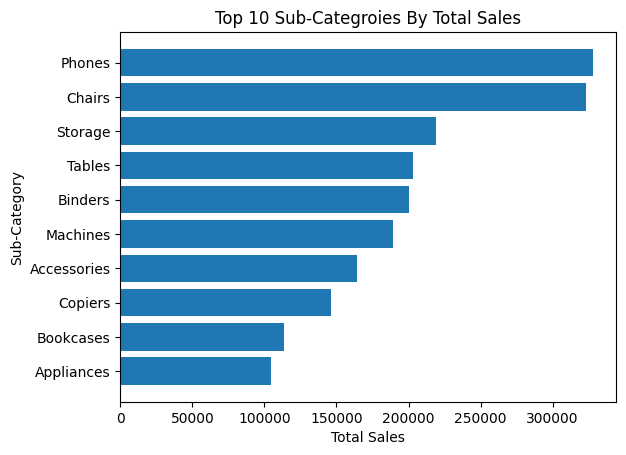

In [42]:
# Plotting bar graph 
plt.barh(top_10_sub_category_sales['Product Sub-Category'], top_10_sub_category_sales['Total Sales'])

# Labels and title
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Top 10 Sub-Categroies By Total Sales')
plt.gca().invert_yaxis()

plt.show()

## Sales Trends

**Yearly**

In [43]:
# converting date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Grouping by year 
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

# Renaming the columns
yearly_sales = yearly_sales.rename(columns={'Sales':'Total Sales'})

print(yearly_sales)

   Order Date  Total Sales
0        2015  479856.2081
1        2016  459436.0054
2        2017  600192.5500
3        2018  722052.0192


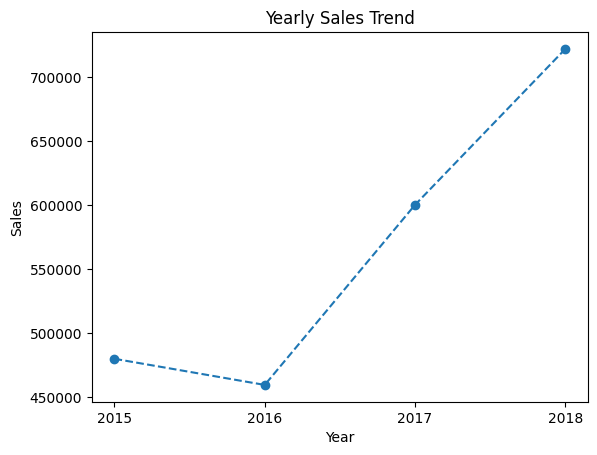

In [44]:
# Plotting line graph
plt.plot(yearly_sales['Order Date'], yearly_sales['Total Sales'], marker='o',linestyle='--')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly Sales Trend')
plt.xticks(yearly_sales['Order Date'])

plt.show()

**Monthly**

In [45]:
# Extract the month name from the date
df['Month'] = df['Order Date'].dt.month_name()

# Group by month name and sum the sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Renaming the columns
monthly_sales = monthly_sales.rename(columns={'Sales':'Total Sales'})

# Optional: To keep calendar order (Jan to Dec)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month').reset_index(drop=True)

print(monthly_sales)


        Month  Total Sales
0     January   94291.6296
1    February   59371.1154
2       March  197573.5872
3       April  136283.0006
4         May  154086.7237
5        June  145837.5233
6        July  145535.6890
7      August  157315.9270
8   September  300103.4117
9     October  199496.2947
10   November  350161.7110
11   December  321480.1695


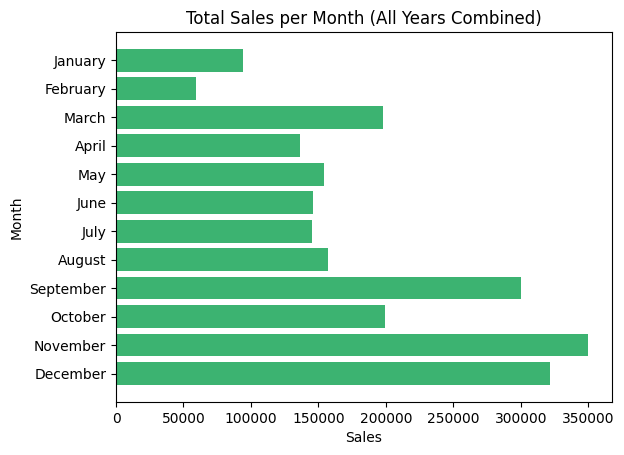

In [46]:
# Plotting horizontal bar graph
plt.barh(monthly_sales['Month'], monthly_sales['Total Sales'], color='mediumseagreen')

# Labels and title
plt.ylabel('Month')
plt.xlabel('Sales')
plt.title('Total Sales per Month (All Years Combined)')
plt.gca().invert_yaxis()
plt.show()